МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

In [1]:
# sudo pip install xgboost

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [4]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


<h1 align="center">Outline</h1> 

- Gardient Boosting
- Overfitting Gardient Boosting
    - Trees/Linear as base estimator
    - Regularization
    - Stohastic Gardient Boosting (Out of bag, step length)
- Compare with bagging
- Bossting and big number of features 
- eXtreme Gradient Boosting vs sklearn

<h1 align="center">Gradient Boosting</h1> 

### Градиентный спуск

Самый простой метод минимизации функции, для оптимизации в каждый момент времени двигаемся по антиградиенту функции с каким-то шагом. 


$$w_{n+1} = w_n - step \cdot \frac{\partial f}{\partial w}$$

### Градиентный бустинг

Теперь давайте представим, что на каждом шаге мы оптимизируем не параметры алгоритма $w$, а ответы нашего алгоритма $\hat{y}$.

**Обучение**: На каждом шаге, давайте предсказывать градиент на каждом объекте и "двигать" ответ в сторону улучшения (антиградиента).

**Как в итоге обучать**:
- Первый алгоритм отвечает константу 
- Добавляем базовые алгоритмы $b_i$, $i = 1, .., N$:
    - Вычисляем градиент функции потерь ПО ОТВЕТАМ $g_{i-1} = \frac{\partial \sum_{j=0}^{i-1} a_j b_j(x)}{\partial y}$ на каждом объекте  
    - Обучаем $b_i$ предсказывать текущий $g_{i-1}$
    - Подбираем $a_i$ -- одномерной минимизацией 
    - Дополняем композицию $\sum_{j=0}^{i-1} a_j b_j (x) + a_i b_i(x)$

---

<h1 align="center">Задачки</h1> 

1) В задаче классификации с двумя классами $Y = {+1, −1}$ разумным выбором является настройка функции $p_+(x) ∈ [0, 1]$, возвращающей вероятность класса +1. В этом случае мы можем измерить правдоподобие обучающей выборк при условии модели $p_{+}(x)$:

![](./img/logist1.png)
![](./img/logist2.png)

----

2) Как будет выглядеть задача поиска базового алгоритма $b_N(x)$ в случае с логистической функцией потерь?

![](./img/logist3.png)

----

<h1 align="center">Overfitting and Regularization</h1> 


- Что будет, если первый классификатор хорошо предскажет все ответы?
- Переобучается ли бустинг в случае переобучения одного базового алгоритма?

### Сгенерируем данные 

In [5]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zt = np.sin(np.sqrt(X**2 + Y**2))

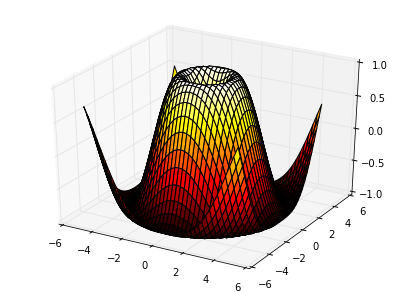

In [6]:
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zt, rstride=1, cstride=1, cmap=cm.hot)

### Наложим шум

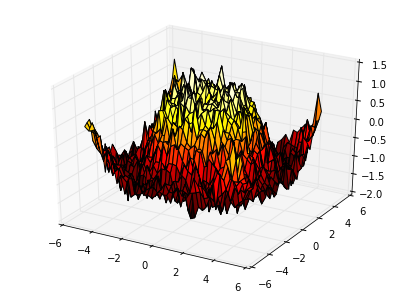

In [7]:
Z = Zt
Z += np.random.normal(size=X.shape)*0.2
Z += np.random.normal(size=X.shape)*0.02 

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot)

### Тренируем AdaBoostRegressor

Каков будет результат?

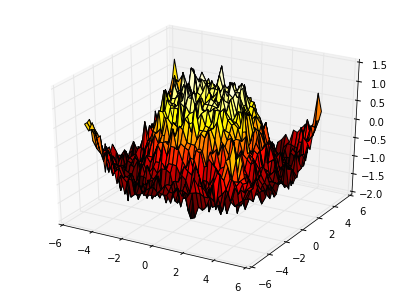

In [8]:
f1 = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(), 
    loss='exponential').fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zf1.reshape(40, 40), rstride=1, cstride=1, cmap=cm.hot)

### Тренируем SVM Regressor

Какой результат будет? Какое ядро стоит взять?

In [9]:
from IPython.display import Image
Image(url='http://scikit-learn.org/stable/_images/plot_iris_0012.png')

In [10]:
help(SVR)

Help on class SVR in module sklearn.svm.classes:

class SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  epsilon : float, optional (default=0.1)
 |       Epsilon in the epsilon-SVR model. It specifies the epsilon-tube
 |       within which no penalty is associated in the training loss function
 |       with points predicted within a distance epsilon from the actual
 |       value.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. I

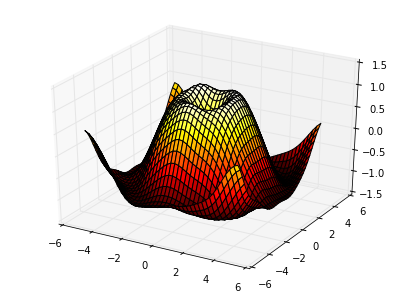

In [11]:
f1 = SVR(kernel='rbf').fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zf1.reshape(40, 40), rstride=1, cstride=1, cmap=cm.hot)

### Делаем из бустинка конфетку

In [12]:
help(AdaBoostRegressor)

Help on class AdaBoostRegressor in module sklearn.ensemble.weight_boosting:

class AdaBoostRegressor(BaseWeightBoosting, sklearn.base.RegressorMixin)
 |  An AdaBoost regressor.
 |  
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, optional (default=DecisionTreeRegressor)
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is required.
 |  
 |  n_estimators : integer, optional (default=50)
 |      The maximum number of estimators at which boosting

- Переобучается ли бустинг в случае переобучения одного базового алгоритма?
- Как регуляризовывать бустинг?
    - Регуляризуем базовые алгоритмы
    - $$\sum_{j=0}^{i-1} a_j b_j (x) + v \cdot a_i b_i(x), 0 < v < 1$$
- Какие функции потерь использовать?

In [ ]:
# ====================================
#       Ячейка интерактива
# ====================================

f1 = AdaBoostRegressor(
    base_estimator=???, 
    loss=???, 
    learning_rate=???, 
    n_estimators=????
).fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zf1.reshape(40, 40), rstride=1, cstride=1, cmap=cm.hot)

<h1 align="center">Real Data</h1> 

In [ ]:
import os
if not (os.path.exists('./data/cifar10') and os.path.exists('./data/adult.data')):
    !sh ./get_data.sh

In [14]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [15]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values

### Gradient Boosting vs Stochastic Gradient Boosting

In [16]:
import warnings
warnings.simplefilter('ignore')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

clf1 = LogisticRegression()
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.79707653  0.79459459  0.7992629   0.8012285 ]


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.84768456  0.84766585  0.8480344   0.8463145 ]


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier()
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.86439012  0.86277641  0.86916462  0.86891892]


In [20]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble.gradient_boosting:

class GradientBoostingClassifier(BaseGradientBoosting, sklearn.base.ClassifierMixin)
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is induced.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'deviance', 'exponential'}, optional (default='deviance')
 |      loss function to be optimized. 'deviance' refers to
 |      deviance (= logistic regression) for classification
 |      with probabilistic outputs. For loss 'exponential' gradient
 |      boosting recovers the AdaBoost a

In [21]:
clf1 = GradientBoostingClassifier(subsample=0.8)
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.86303894  0.86228501  0.86916462  0.86719902]


### Gradient Boosting and a lot of features

In [22]:
from utils import load_CIFAR10
from sklearn.metrics import accuracy_score

In [23]:
X_train, y_train, X_test, y_test = load_CIFAR10('./data/cifar10/cifar-10-batches-py')

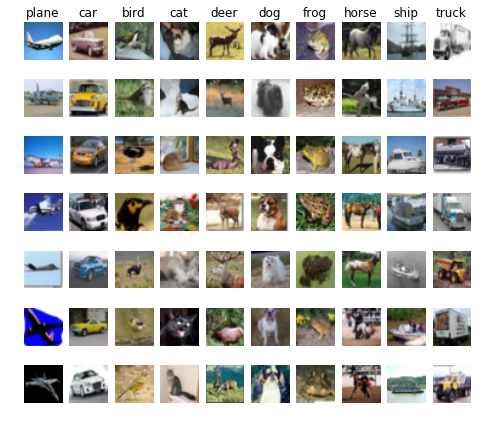

In [24]:
plt.figure(figsize=(8, 7))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [25]:
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

In [26]:
# ===========================================
#  Даже не пытйтесь это учить. Почему??!!
# ===========================================

#clf1 = GradientBoostingClassifier(subsample=0.3, learning_rate=0.05, n_estimators=10).fit(X_train, y_train)
#print accuracy_score(clf1.predict(X_train), y_train), accuracy_score(clf1.predict(X_test), y_test)

In [27]:
from sklearn.decomposition import PCA

In [28]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :])
X_tr, X_te = transform.transform(X_train), transform.transform(X_test)

In [29]:
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05, n_estimators=100).fit(X_tr[:3000], y_train[:3000])
print accuracy_score(clf1.predict(X_tr), y_train), accuracy_score(clf1.predict(X_te), y_test)

0.35746 0.3294


### Будет ли лучше, если вычесть среднюю картинку?

In [30]:
mean = X_train.mean(axis=0)

In [31]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :]-mean)

In [32]:
X_tr, X_te = transform.transform(X_train-mean), transform.transform(X_test-mean)

In [33]:
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05, n_estimators=100).fit(X_tr[:3000], y_train[:3000])
print accuracy_score(clf1.predict(X_tr), y_train), accuracy_score(clf1.predict(X_te), y_test)

0.36132 0.3324


### Length of dataset

In [34]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :])
X_tr, X_te = transform.transform(X_train), transform.transform(X_test)

In [35]:
for i in [300, 1000]:#, 3000, 5000, 10000, 20000, 40000]:
    %time clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
    print '#num_items', i, 'test', accuracy_score(clf1.predict(X_te), y_test), '\n'

CPU times: user 5.74 s, sys: 67.8 ms, total: 5.81 s
Wall time: 5.67 s
#num_items 300 test 0.1668 

CPU times: user 18.5 s, sys: 42.4 ms, total: 18.5 s
Wall time: 18.5 s
#num_items 1000 test 0.1823 



<h1 align="center">eXtreme Gradient Boosting vs sklearn</h1> 

In [36]:
import xgboost as xgb

In [37]:
%%time
i = 5000
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
print 'test', accuracy_score(clf1.predict(X_te), y_test)

test 0.3753
CPU times: user 1min 47s, sys: 743 ms, total: 1min 48s
Wall time: 1min 49s


In [38]:
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |      Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of boosted trees to fit.
 |  silent : boolean
 |      Whether to print messages while running boosting.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  nthread : int
 |      Number of parallel threads used to run xgboost.
 |  gamma : float
 |      Minimum loss reduction required to make a further partition on a leaf node of the tree.
 |  min_child_weight : int
 |      Minimum sum of instance weight(hessian) needed in a child.
 |  max_delta_step : int
 |      Ma

In [39]:
%%time
i = 5000
clf1 = xgb.XGBClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
print 'test', accuracy_score(clf1.predict(X_te), y_test)

test 0.3934
CPU times: user 1min 26s, sys: 2.58 s, total: 1min 29s
Wall time: 29.6 s


Качество лучше, работает быстрее. Иногда проигрывает RGBM, надо пробовать. 

Итак, градиентный бустинг в XGBoost имеет ряд важных особенностей.
1. Базовый алгоритм приближает направление, посчитанное с учетом вторых производных функции потерь.
2. Отклонение направления, построенного базовым алгоритмом, измеряется с помощью модифицированного функционала — из него удалено деление на вторую производную, за счет чего избегаются численные проблемы.
3. Функционал регуляризуется -- добавляются штрафы за количество листьев и за норму коэффициентов.
4. При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига.
5. Критерий останова при обучении дерева также зависит от оптимального сдвига.

In [ ]:
%%time

from sklearn.grid_search import GridSearchCV

grid = {'n_estimators': [50, 100], 'max_depth': [4, 6]}
gs = GridSearchCV(xgb.XGBClassifier(), grid, scoring='accuracy', cv=2, n_jobs=4)
gs.fit(X_tr, y_train)

for a in gs.grid_scores_:
    print a.parameters, a.mean_validation_score

# Осталось время: контест на паре, лучшее качество бустингом на CIFAR10

<h1 align="center">Recap</h1> 

**Что почитать**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy